# AFIT Wrapped 2022

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import re
import seaborn as sns

from random import choice
from tqdm import tqdm
from IPython.display import Markdown as md

color_pairs = [
    ('#E2D1F9', '#317773'), # lavender and teal
    ('#CCF381', '#4831D4'), # lime and blue
    ('#2C5F2D', '#97BC62FF'), # forest green and moss green
    ('#FFE77AFF', '#2C5F2DFF') #  yellow and green
]

def rand_color_pair():
    return choice(color_pairs)

def rand_color():
    return choice(rand_color_pair())

font_prop = FontProperties(fname="./fonts/FontsFree-Net-CircularStd-Bold.ttf")
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.figsize'] = [15, 8]

In [4]:
# Parse the conversation. First into lines
# convo_fname = 'convo.txt'
# with open(convo_fname, 'r') as f:
#     lines = f.readlines()
#     lines = [line.strip() for line in lines]

# df = pd.DataFrame(columns=['date', 'time', 'author', 'message'])

# for line in tqdm(lines):
#     # 11/04/2022, 13:09 - Fco: jajajajajjajajjajajajajaja

#     if line.startswith('['):
#         continue
#     try:
#         date = re.search(r'\d{2}/\d{2}/\d{4}', line).group()
#         time = re.search(r'\d{2}:\d{2}', line).group()
#         author = re.search(r'(?<=- )\w+', line).group()
#         message = re.search(r'(?<=: ).*', line).group()
#     except:
#         continue

#     row = pd.DataFrame([[date, time, author, message]], columns=['date', 'time', 'author', 'message'])
#     df = pd.concat([df, row], ignore_index=True)


In [5]:
# df.to_csv('convo.csv', index=False)
df = pd.read_csv('convo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79998 entries, 0 to 79997
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     79998 non-null  object
 1   time     79998 non-null  object
 2   author   79998 non-null  object
 3   message  79575 non-null  object
dtypes: object(4)
memory usage: 2.4+ MB


In [6]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time
df['message'] = df['message'].fillna('')
df['n_words'] = df['message'].apply(lambda x: len(x.split()))

In [7]:
# Print column types of first elem in
for col in df.columns:
    print(col, type(df[col][0]))

date <class 'pandas._libs.tslibs.timestamps.Timestamp'>
time <class 'datetime.time'>
author <class 'str'>
message <class 'str'>
n_words <class 'numpy.int64'>


In [8]:
df.head()

,date,time,author,message,n_words
0,2022-04-11,13:05:00,Andrea,tengo ganas de que pruebes la otra tosta de la...,11
1,2022-04-11,13:05:00,Fco,digo el popper en el centro que como que no pe...,11
2,2022-04-11,13:05:00,Fco,anda que noo,3
3,2022-04-11,13:06:00,Fco,no me vistee,3
4,2022-04-11,13:06:00,Andrea,ahhhhhh,1


In [9]:
users = df['author'].unique()
print(users)

['Andrea' 'Fco']


In [10]:
# First day of the chat and last day of the chat
first_day = df['date'].min().strftime('%d/%m/%Y')
last_day = df['date'].max().strftime('%d/%m/%Y')

md(f"Hemos recogido todos los mensajes comprendidos entre el {first_day} y el {last_day}. Por motivos de WhatsApp, no podemos acceder a los mensajes anteriores a esa fecha.")

Hemos recogido todos los mensajes comprendidos entre el 11/04/2022 y el 31/12/2022. Por motivos de WhatsApp, no podemos acceder a los mensajes anteriores a esa fecha.

In [11]:
months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

/tmp/ipykernel_73908/3681825053.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  aux['week'] = aux['date'].dt.week
/tmp/ipykernel_73908/3681825053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_grouped = aux.groupby(['week']).sum().reset_index()


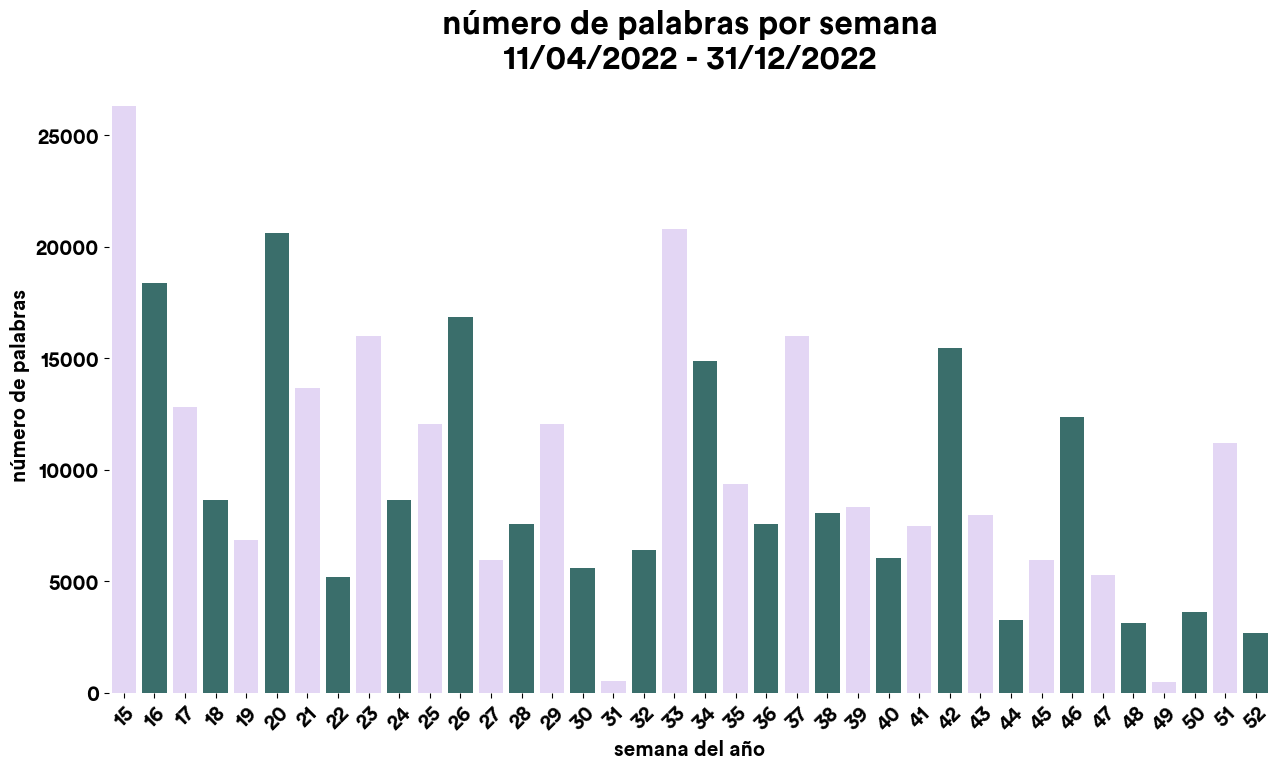

In [12]:
aux = df.copy()
aux['week'] = aux['date'].dt.week
aux_grouped = aux.groupby(['week']).sum().reset_index()

sns.barplot(x='week', y='n_words', data=aux_grouped, palette=rand_color_pair())
plt.title('número de palabras por semana\n' + first_day + ' - ' + last_day)
# remove spines and ticks
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45)
plt.xlabel('semana del año')
plt.ylabel('número de palabras')
plt.show()

## ¿Cuántos mensajes ha enviado cada uno?

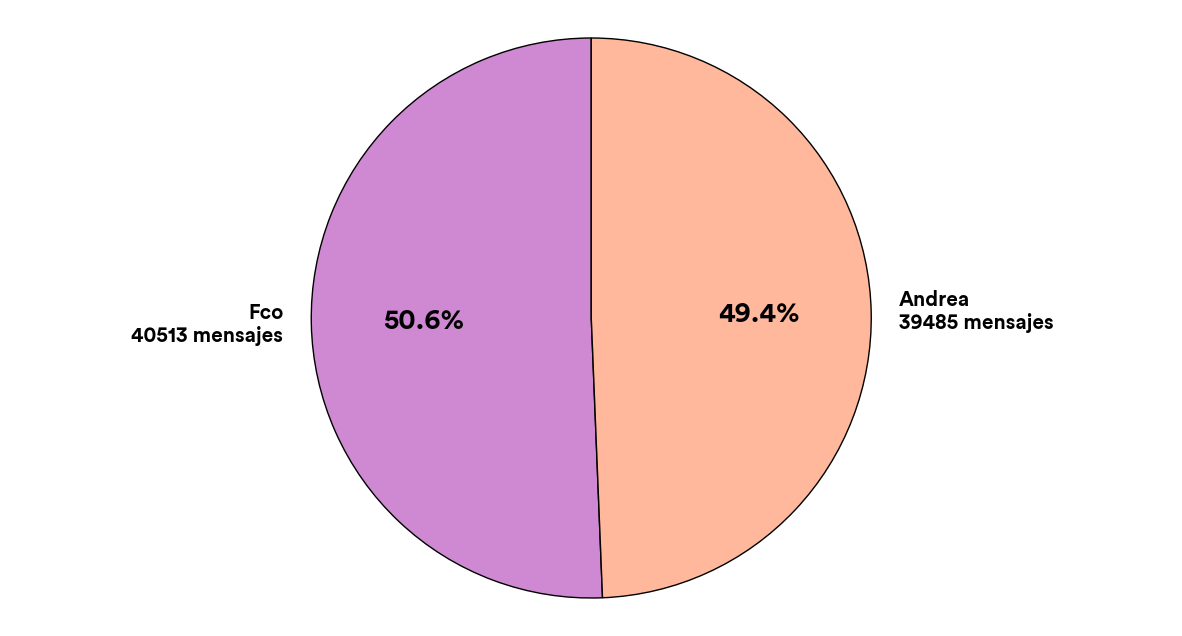

In [13]:
# Number of messages per user and its percentage
x = df.groupby('author')['message'].count().reset_index()
x['percentage'] = x['message'] / x['message'].sum() * 100
x = x.sort_values(by='message', ascending=False)
x = x.reset_index(drop=True)
x['message'] = x['message'].astype(int)
x['percentage'] = x['percentage'].round(2)

# Pie chart
# Label is the author, new line and its percentage new line and number of messages
labels = x['author'] + '\n' + x['message'].astype(str) + ' mensajes'
sizes = x['percentage']

fig1, ax1 = plt.subplots()
colors = ['#BF61C4BF', '#FFA07ABF']
# Colors are orange and blue at .7 opacity
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [14]:
# Md total de mensajes enviados
# Mean of messages per day
avg_msgs_per_day = df['date'].dt.date.value_counts().mean()
md(f"En total, se han enviado {x['message'].sum()} mensajes. El que más mensajes ha enviado es {x['author'][0]} con un {x['percentage'][0]}% de los mensajes totales, mientras que {x['author'][len(x)-1]}, ha enviado un {x['percentage'][len(x)-1]}% de los mensajes totales. De media, se envían {avg_msgs_per_day:.2f} mensajes por día.")

En total, se han enviado 79998 mensajes. El que más mensajes ha enviado es Fco con un 50.64% de los mensajes totales, mientras que Andrea, ha enviado un 49.36% de los mensajes totales. De media, se envían 314.95 mensajes por día.

## ¿Cuántas palabras ha escrito cada uno?

In [15]:
# Count number of words per message
x = df.groupby('author')['word_count'].sum().reset_index()
x['percentage'] = x['word_count'] / x['word_count'].sum() * 100
x = x.sort_values(by='word_count', ascending=False)
x = x.reset_index(drop=True)
x['word_count'] = x['word_count'].astype(int)
x['percentage'] = x['percentage'].round(2)

labels = x['author'] + '\n' + x['word_count'].astype(str) + ' palabras'
sizes = x['percentage']

fig1, ax1 = plt.subplots()
colors = ['#BF61C4BF', '#FFA07ABF']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


KeyError: 'Column not found: word_count'

findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not

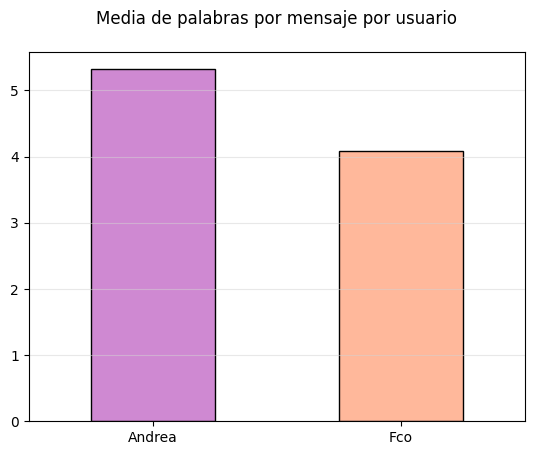

In [ ]:
# Media de palabras por mensaje por usuario
x = df.groupby('author')['word_count'].mean().reset_index()
x['word_count'] = x['word_count'].round(2)
x = x.sort_values(by='word_count', ascending=False)
x = x.reset_index(drop=True)

# Bar chart. Default bar chart
ax = x.plot.bar(x='author', y='word_count', rot=0, color=colors, edgecolor='black')
ax.set_xlabel(None)
ax.legend().set_visible(False)
ax.set_title("Media de palabras por mensaje por usuario", loc='center', pad=20)
# Print horizontal lines at each tick
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

plt.show()


## ¿Cuántos mensajes seguidos enviamos cada uno?

In [ ]:
# Get the "clusters" of messages sent continuously by the same user
# Traverse the dataframe and check if the next message is from the same user
# Create a dict of the form {author: {cluster_number: [length_of_msg1, length_of_msg2, ...]}}

clusters = {}
for i in range(len(df)-1):
    if df['author'][i] == df['author'][i+1]:
        if df['author'][i] in clusters:
            if 'cluster' in clusters[df['author'][i]]:
                clusters[df['author'][i]]['cluster'] += 1
                clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]
            else:
                clusters[df['author'][i]]['cluster'] = 1
                clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]
        else:
            clusters[df['author'][i]] = {}
            clusters[df['author'][i]]['cluster'] = 1
            clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]
    else:
        if df['author'][i] in clusters:
            if 'cluster' in clusters[df['author'][i]]:
                clusters[df['author'][i]][clusters[df['author'][i]]['cluster']].append(df['word_count'][i])
            else:
                clusters[df['author'][i]]['cluster'] = 1
                clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]
        else:
            clusters[df['author'][i]] = {}
            clusters[df['author'][i]]['cluster'] = 1
            clusters[df['author'][i]][clusters[df['author'][i]]['cluster']] = [df['word_count'][i]]


In [ ]:
# Size of the clusters
cluster_sizes = {}

for user in clusters:
    cluster_sizes[user] = {}
    for cluster in clusters[user]:
        if cluster != 'cluster':
            cluster_sizes[user][cluster] = len(clusters[user][cluster])


Un cluster es un grupo o conjunto de elementos que tienen alguna característica en común. En este caso, los clusters que se han creado son conjuntos de mensajes que han sido enviados de forma consecutiva por el mismo usuario. Por ejemplo, si un usuario envía tres mensajes seguidos, estos tres mensajes forman parte del mismo cluster.

Como vemos, ambos somos iguales en este sentido.

findfont: Font family 'Circular Std' not found.
findfont: Font family ['Circular Std'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont:

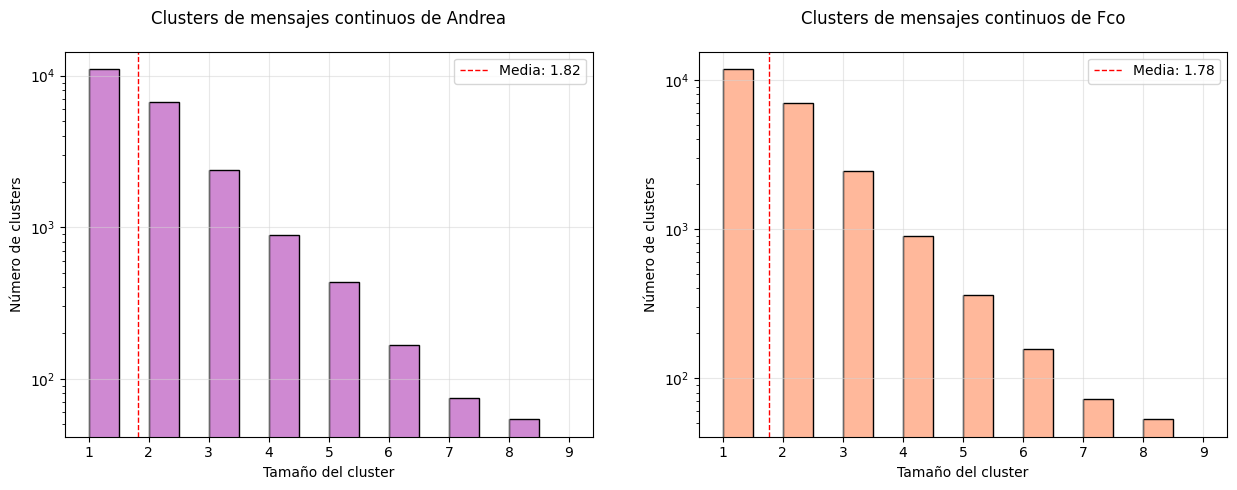

In [ ]:
# Plot histogram of cluster sizes. Add ticks for each bar.
# Add a mean line

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, user in enumerate(users):
    ax = axes[i]
    ax.hist(cluster_sizes[user].values(), bins=range(1, 10), edgecolor='black', color=colors[i], width=0.5, log=True)
    ax.set_xticks(range(1, 10))
    ax.set_title(f"Clusters de mensajes continuos de {user}", loc='center', pad=20)
    ax.set_xlabel("Tamaño del cluster")
    ax.set_ylabel("Número de clusters")
    ax.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

    mean = np.mean(list(cluster_sizes[user].values()))
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1)
    # Print the mean in the legend
    ax.legend([f"Media: {mean:.2f}"], loc='upper right')
    


plt.show()

## ¿Cuánto hablamos....

### ...por día?

findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not

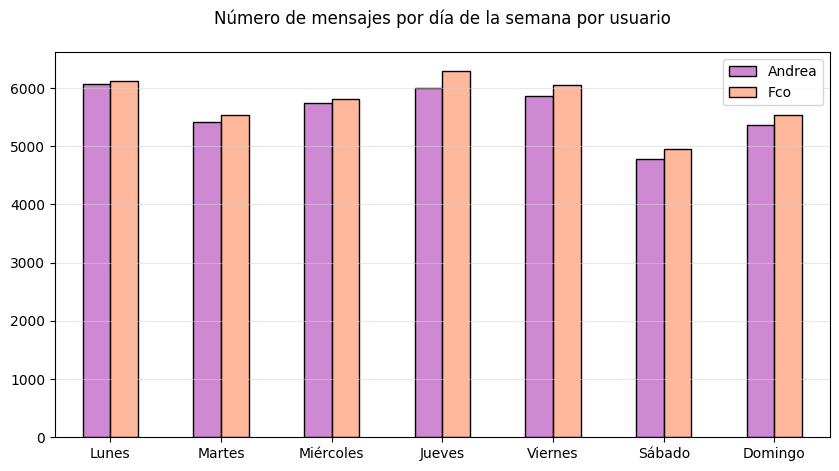

In [ ]:
# Number of messages per day of the week per user
x = df.groupby(['author', 'weekday_name'])['message'].count().reset_index()
x = x.pivot(index='weekday_name', columns='author', values='message')
# Order days of the week
x = x.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Bar chart. Default bar chart
ax = x.plot.bar(rot=0, color=colors, edgecolor='black', figsize=(10, 5))
ax.set_xlabel(None)
ax.set_title("Número de mensajes por día de la semana por usuario", loc='center', pad=20)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
# Remove title of legend
ax.legend().set_title(None)

plt.show()


### ...y por hora?

findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not found.
findfont: Font family 'Circular Std' not

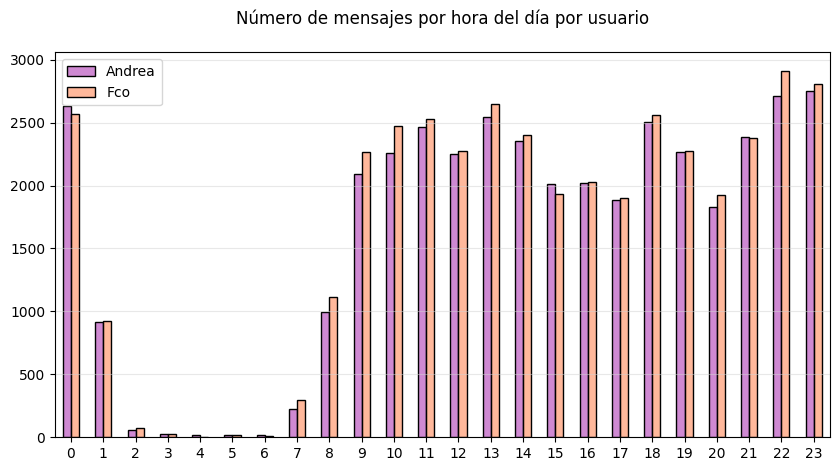

In [ ]:
# Per hour of the day
x = df.groupby(['author', 'hour'])['message'].count().reset_index()
x = x.pivot(index='hour', columns='author', values='message')

# Bar chart. Default bar chart
ax = x.plot.bar(rot=0, color=colors, edgecolor='black', figsize=(10, 5))
ax.set_xlabel(None)
ax.set_title("Número de mensajes por hora del día por usuario", loc='center', pad=20)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
# Remove title of legend
ax.legend().set_title(None)

plt.show()



## Sentimientos y positividad en nuestros mensajes

### Preprocesamiento

Primero de todo debemos limpiar los mensajes. Esto es corregir textos principalmente para que los modelos preentrenados puedan funcionar correctamente y no se vean afectados por errores de ortografía, por ejemplo.